## Loading Libraries

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


### loading data

In [92]:
df = pd.read_csv("nigeria_houses_data.csv")
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [94]:
df.title.unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

## checking the shape

In [3]:
df.shape

(24326, 8)

### checking info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


## Data cleaning

### checking for missing value

In [5]:
df.isna().sum() 

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

# checking for duplicate

In [6]:
#df.duplicated().sum()

## exploratory data analysis

### descriptive analysis

In [7]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


### How many house type do we have

In [8]:
house_type = df['title'].value_counts()
house_type

Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: title, dtype: int64

### plotting house type

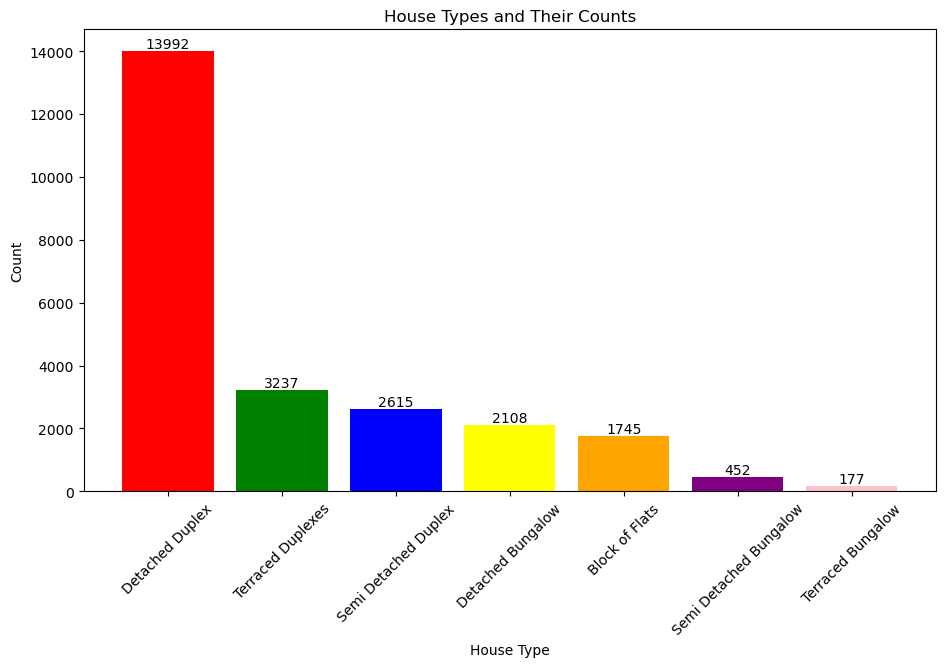

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and 'title' is the column you're analyzing
house_type = df['title'].value_counts()

# Converting the Series to index and values for plotting
house_type_index = house_type.index
house_type_values = house_type.values

# Setting figure size
plt.figure(figsize=(11, 6))

# Define a list of colors, making sure it matches the number of unique house types
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta'][:len(house_type_index)]

# Plotting the bar chart
bars = plt.bar(house_type_index, height=house_type_values, color=colors)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels (optional)
plt.title('House Types and Their Counts')
plt.xlabel('House Type')
plt.ylabel('Count')

plt.savefig("housetype.png",dpi=1000)
# Displaying the plot
plt.show()


### Top 10 how many state

In [10]:
df['state'].value_counts().sort_values(ascending=False)[0:10]

Lagos       18445
Abuja        3524
Ogun          637
Oyo           477
Rivers        444
Imo           246
Anambara      145
Enugu         128
Edo           100
Delta          63
Name: state, dtype: int64

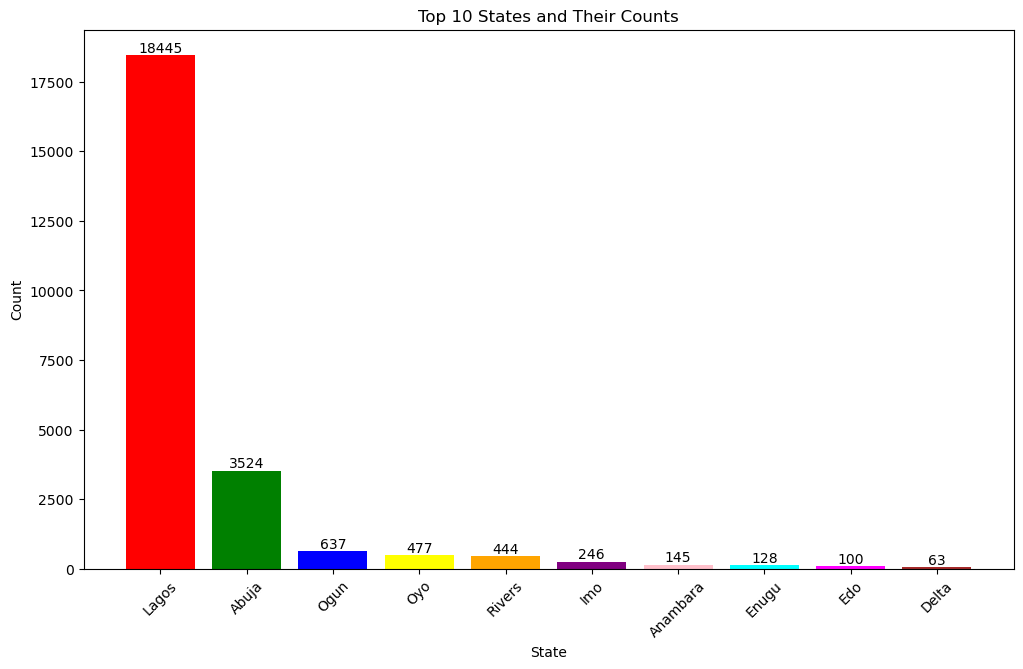

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
# df = pd.DataFrame({'state': ['State1', 'State2', ...]})

# Get the top 10 states
top_10_states = df['state'].value_counts().sort_values(ascending=False).head(10)

# Extracting indices and values
state_names = top_10_states.index
state_counts = top_10_states.values

# Setting figure size
plt.figure(figsize=(12, 7))

# Colors for each bar (ensuring there are 10 colors)
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown']

# Plotting the bar chart
bars = plt.bar(state_names, height=state_counts, color=colors)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels (optional)
plt.title('Top 10 States and Their Counts')
plt.xlabel('State')
plt.ylabel('Count')

# Displaying the plot
plt.show()


### Top 10 town in lagos

In [12]:
df[df['state']=='Lagos']['town'].value_counts().sort_values(ascending=False)[0:10]

Lekki                   10841
Ajah                     2142
Ikoyi                    1541
Ikeja                     686
Victoria Island (VI)      493
Ibeju Lekki               492
Magodo                    375
Ikorodu                   236
Isheri North              194
Isolo                     176
Name: town, dtype: int64

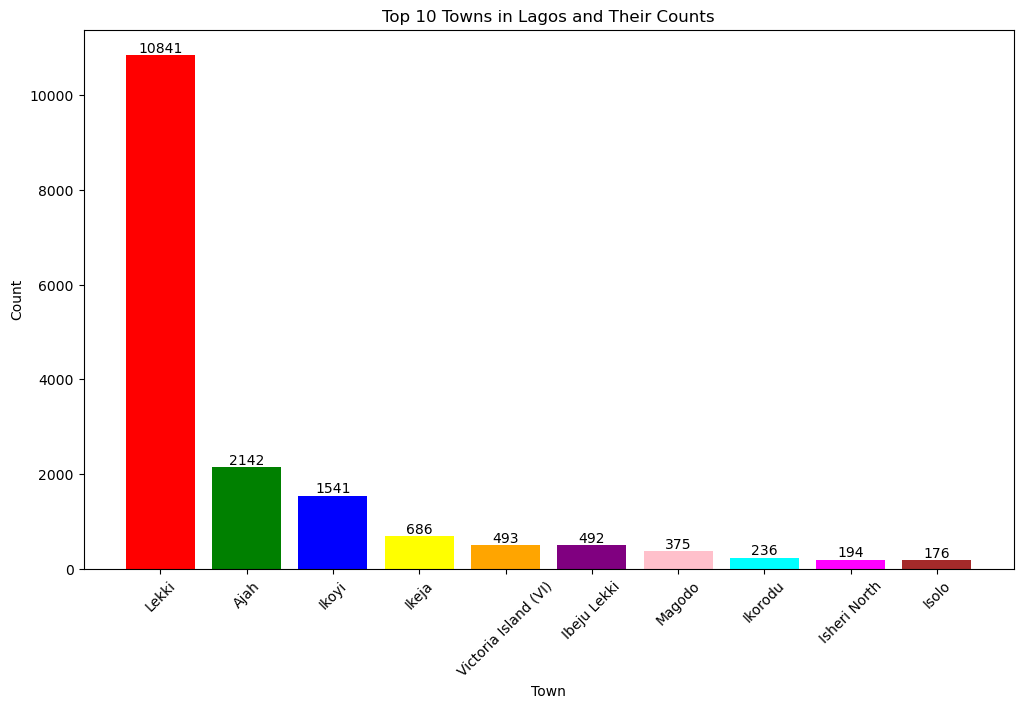

In [13]:
import matplotlib.pyplot as plt
import pandas as pd



# Filter DataFrame for rows where state is 'Lagos'
lagos_towns = df[df['state'] == 'Lagos']['town']

# Get the top 10 towns in Lagos
top_10_towns = lagos_towns.value_counts().sort_values(ascending=False).head(10)

# Extracting indices and values
town_names = top_10_towns.index
town_counts = top_10_towns.values

# Setting figure size
plt.figure(figsize=(12, 7))

# Colors for each bar (ensuring there are 10 colors)
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown']

# Plotting the bar chart
bars = plt.bar(town_names, height=town_counts, color=colors)

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels (optional)
plt.title('Top 10 Towns in Lagos and Their Counts')
plt.xlabel('Town')
plt.ylabel('Count')

# Displaying the plot
plt.show()


## distribution of price

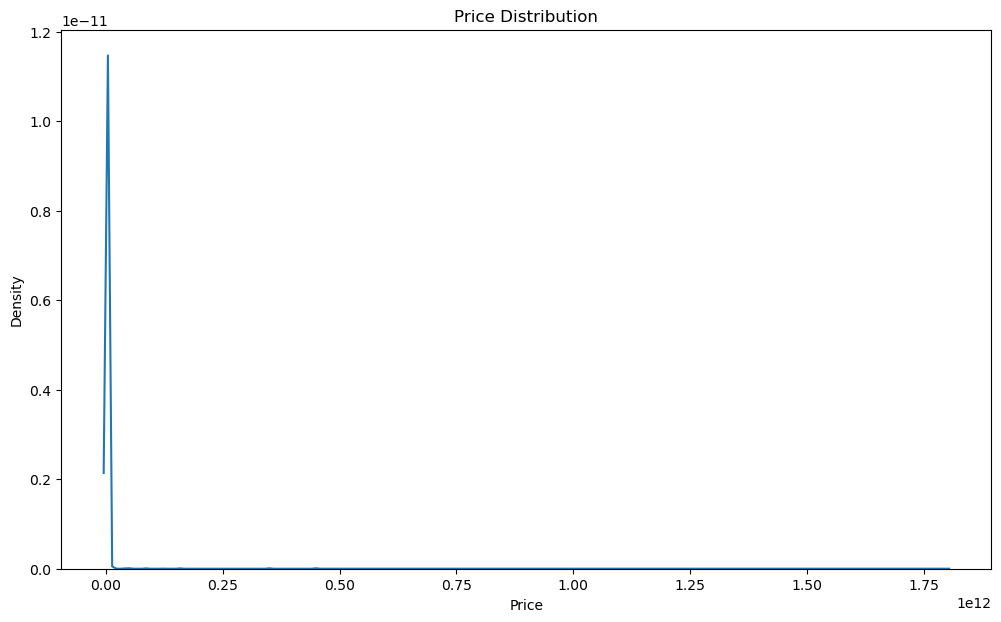

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'price' is the column you want to plot

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the KDE plot for the 'price' column
sns.kdeplot(data=df, x='price')

# Adding titles and labels (optional)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Displaying the plot
plt.show()


## filtering house in ajah

In [15]:
ajah = df[df['town'] == 'Ajah']
ajah

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0
24,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,60000000.0
36,3.0,5.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,40000000.0
53,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,Lagos,60000000.0
...,...,...,...,...,...,...,...,...
24277,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,Lagos,75000000.0
24283,2.0,2.0,2.0,2.0,Detached Duplex,Ajah,Lagos,240000000.0
24288,3.0,4.0,4.0,3.0,Terraced Duplexes,Ajah,Lagos,40000000.0
24313,5.0,5.0,6.0,6.0,Detached Duplex,Ajah,Lagos,130000000.0


In [16]:
## removing duplicate

In [17]:
#ajah.duplicated().sum()


In [18]:
#ajah.drop_duplicates(inplace=True)

## descriptive analysis of houses in ajah

In [19]:
ajah.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,2164.000000,2164.000000,2164.000000,2164.000000,2.164000e+03
mean,3.893715,4.224122,4.875693,3.797135,1.033529e+08
std,0.981934,1.046382,1.061572,1.265850,1.402012e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,3.000000,4.000000,4.000000,3.000000,4.000000e+07
50%,4.000000,4.000000,5.000000,4.000000,5.650000e+07
75%,4.000000,5.000000,5.000000,4.000000,7.000000e+07
max,9.000000,9.000000,9.000000,9.000000,5.000000e+10


### average price of each house in ajah

In [20]:
ajah.groupby('title')['price'].mean()

title
Block of Flats            4.341380e+07
Detached Bungalow         3.418110e+07
Detached Duplex           1.185608e+08
Semi Detached Bungalow    2.871964e+07
Semi Detached Duplex      2.282604e+08
Terraced Bungalow         3.450000e+07
Terraced Duplexes         4.074838e+07
Name: price, dtype: float64

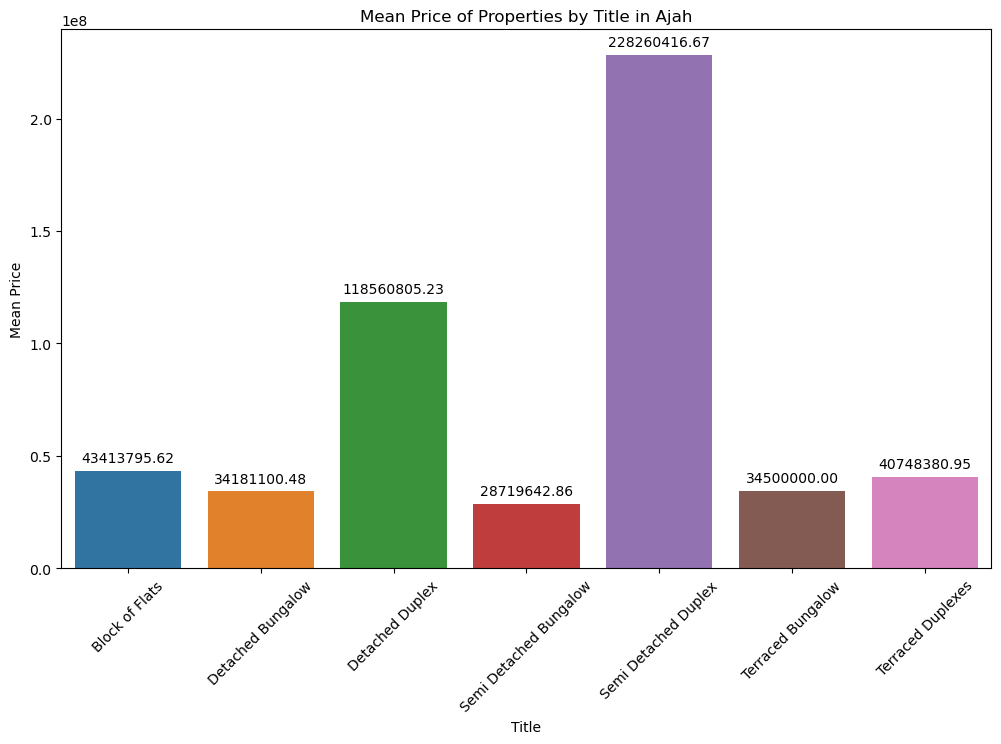

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Ajah' is a subset DataFrame containing properties in the Ajah area

# Calculate the mean price of properties grouped by their titles
mean_prices = ajah.groupby('title')['price'].mean()

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating a bar plot for the mean prices
ax = sns.barplot(x=mean_prices.index, y=mean_prices.values)

# Adding titles and labels (optional)
plt.title('Mean Price of Properties by Title in Ajah')
plt.xlabel('Title')
plt.ylabel('Mean Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding text labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Displaying the plot
plt.show()


## data preprocessing

### checking for outliers

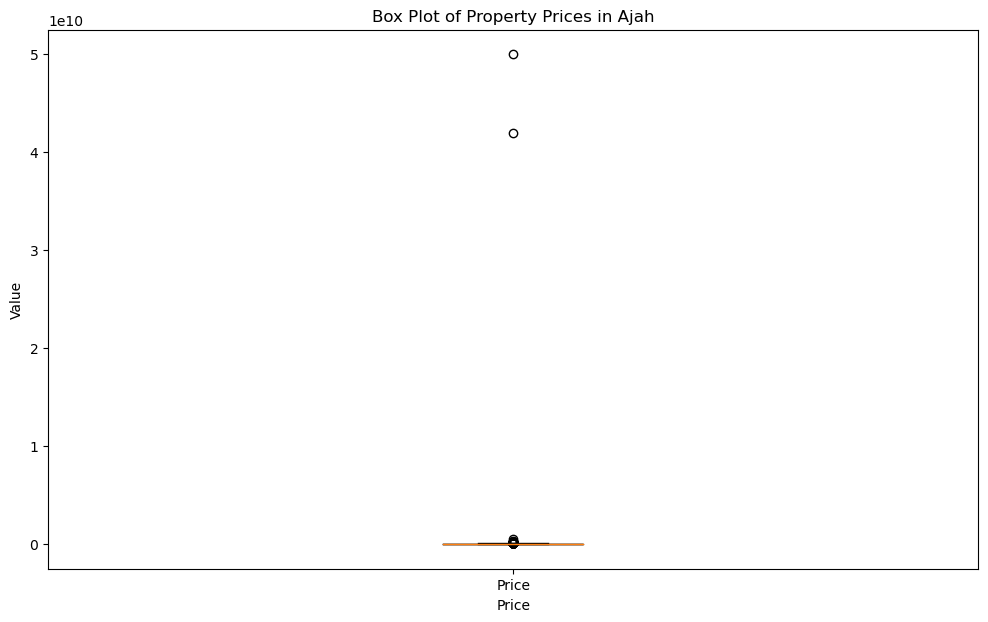

In [22]:
import matplotlib.pyplot as plt

# Assuming 'Ajah' is a subset DataFrame containing properties in the Ajah area

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the box plot for the 'price' column
plt.boxplot(ajah['price'])

# Adding titles and labels (optional)
plt.title('Box Plot of Property Prices in Ajah')
plt.xlabel('Price')
plt.ylabel('Value')

# Setting x-tick labels
plt.xticks([1], ['Price'])

# Displaying the plot
plt.show()


## removing outliers 

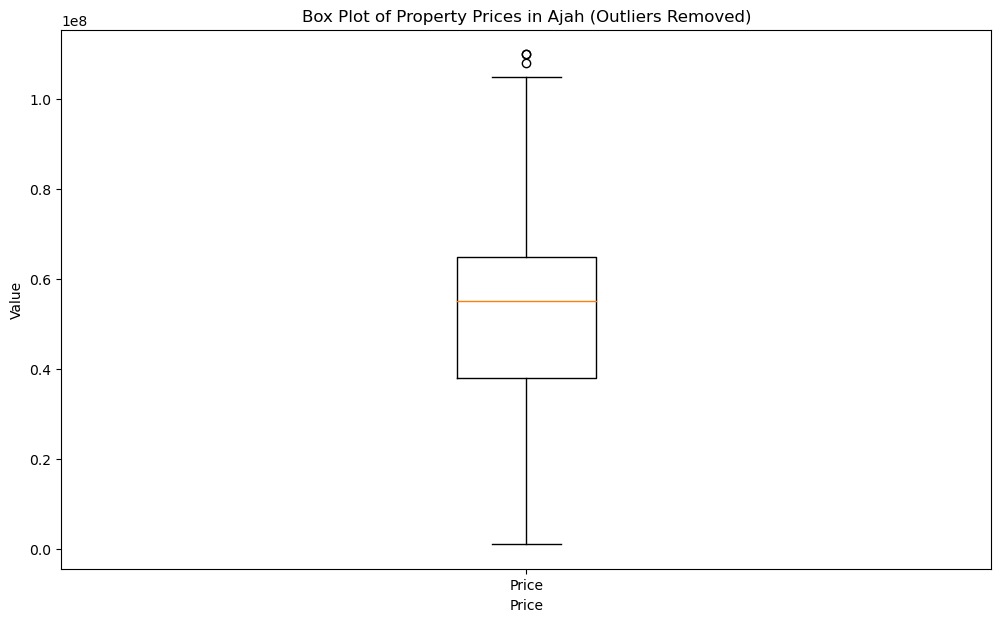

In [23]:
import matplotlib.pyplot as plt

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = ajah['price'].quantile(0.25)
Q3 = ajah['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
ajah_filtered = ajah[(ajah['price'] >= lower_bound) & (ajah['price'] <= upper_bound)]

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the box plot for the 'price' column without outliers
plt.boxplot(ajah_filtered['price'])

# Adding titles and labels (optional)
plt.title('Box Plot of Property Prices in Ajah (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Value')

# Setting x-tick labels
plt.xticks([1], ['Price'])

# Displaying the plot
plt.show()


### checking correlation 

In [24]:
ajah_filtered.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_8272\2863846979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ajah_filtered.corr()


,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.709876,0.748947,0.283018,0.587510
bathrooms,0.709876,1.000000,0.795935,0.287016,0.472588
toilets,0.748947,0.795935,1.000000,0.253210,0.509548
parking_space,0.283018,0.287016,0.253210,1.000000,0.222044
price,0.587510,0.472588,0.509548,0.222044,1.000000


In [25]:
"""there is a strong positive linear relationship 
between price and bathroom and also there is a positive linear relationship between bedroom and price"""

'there is a strong positive linear relationship \nbetween price and bathroom and also there is a positive linear relationship between bedroom and price'

### ploting scatter plot for price and bedroom

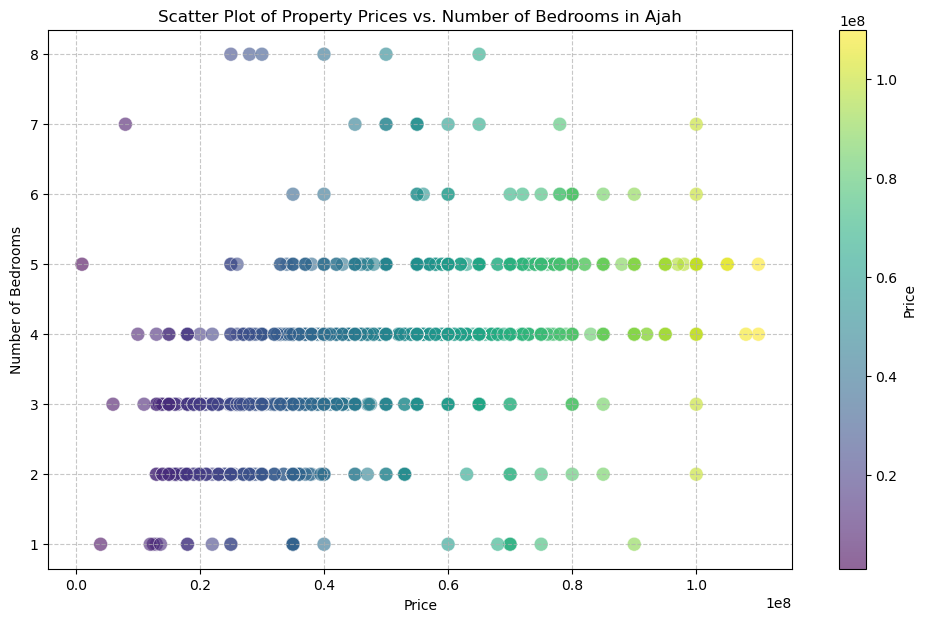

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# ajah_filtered = pd.DataFrame({'price': [your_price_data], 'bedroom': [your_bedroom_data]})

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot with additional styling
scatter = plt.scatter(
    data=ajah_filtered, 
    x='price', 
    y='bedrooms', 
    c=ajah_filtered['price'],  # Color by price
    cmap='viridis',            # Color map
    s=100,                     # Marker size
    alpha=0.6,                 # Transparency
    edgecolors='w',            # White edge color
    linewidth=0.5              # Edge line width
)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Adding titles and labels
plt.title('Scatter Plot of Property Prices vs. Number of Bedrooms in Ajah')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


##### scatterplot for price and bathrooms

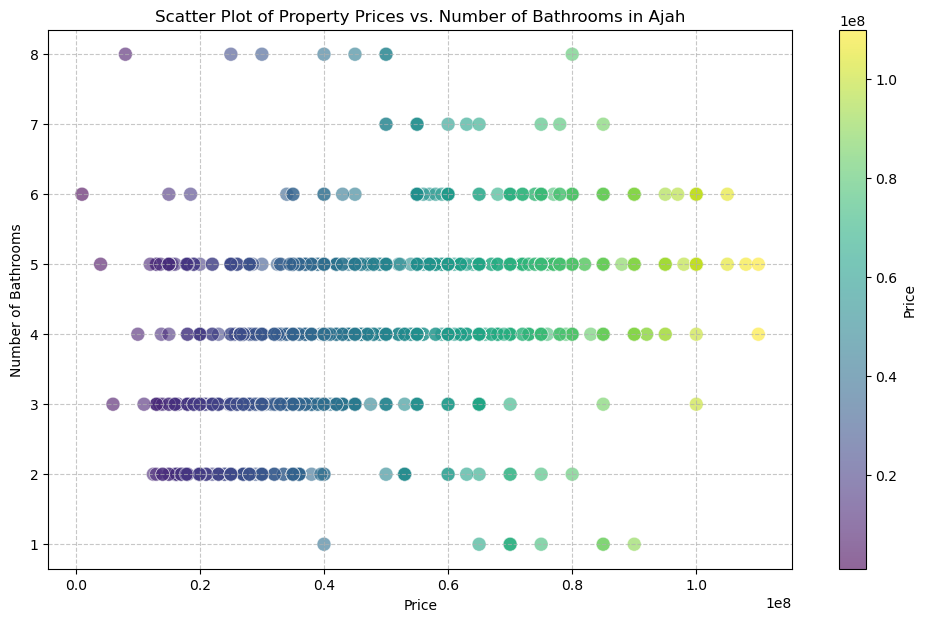

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# ajah_filtered = pd.DataFrame({'price': [your_price_data], 'bathroom': [your_bathroom_data]})

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot with additional styling
scatter = plt.scatter(
    data=ajah_filtered, 
    x='price', 
    y='bathrooms', 
    c=ajah_filtered['price'],  # Color by price
    cmap='viridis',            # Color map
    s=100,                     # Marker size
    alpha=0.6,                 # Transparency
    edgecolors='w',            # White edge color
    linewidth=0.5              # Edge line width
)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Adding titles and labels
plt.title('Scatter Plot of Property Prices vs. Number of Bathrooms in Ajah')
plt.xlabel('Price')
plt.ylabel('Number of Bathrooms')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


### scatterplot between price and toilet

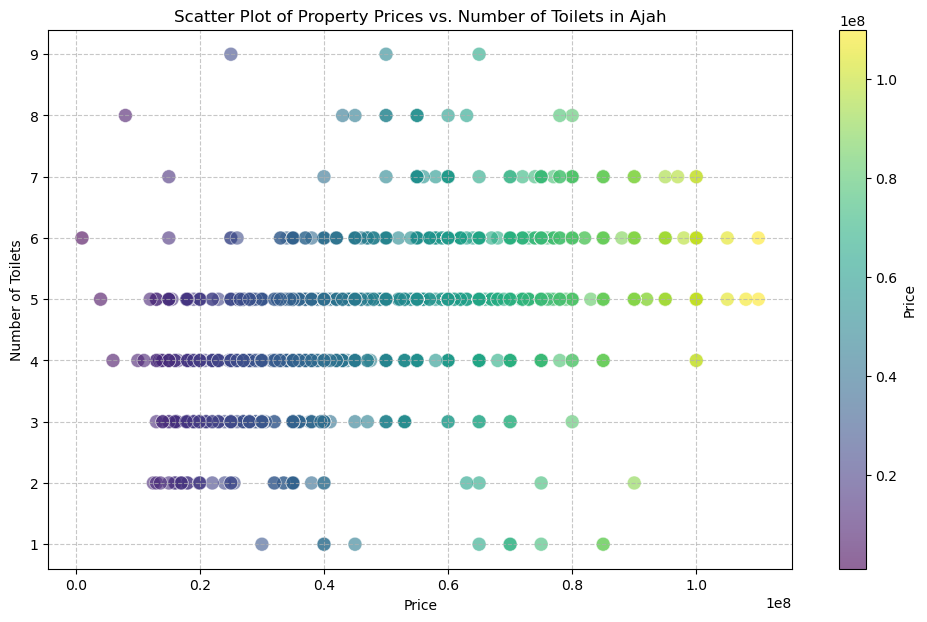

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
# ajah_filtered = pd.DataFrame({'price': [your_price_data], 'toilet': [your_toilet_data]})

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot with additional styling
scatter = plt.scatter(
    data=ajah_filtered, 
    x='price', 
    y='toilets', 
    c=ajah_filtered['price'],  # Color by price
    cmap='viridis',            # Color map
    s=100,                     # Marker size
    alpha=0.6,                 # Transparency
    edgecolors='w',            # White edge color
    linewidth=0.5              # Edge line width
)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Adding titles and labels
plt.title('Scatter Plot of Property Prices vs. Number of Toilets in Ajah')
plt.xlabel('Price')
plt.ylabel('Number of Toilets')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


##### Distribution of house price in ajah

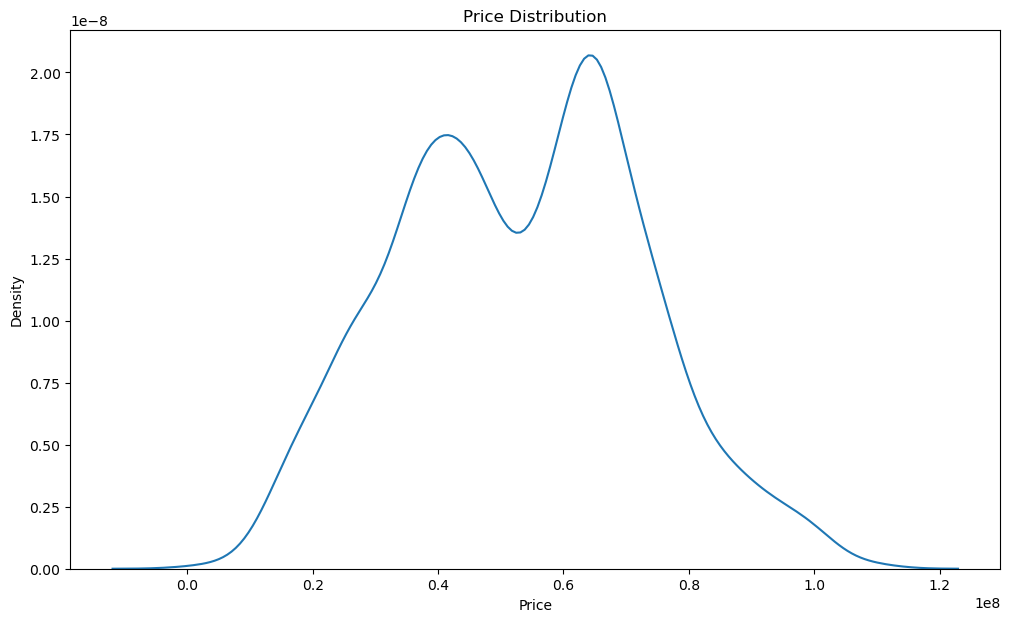

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'price' is the column you want to plot

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the KDE plot for the 'price' column
sns.kdeplot(data=ajah_filtered, x='price')

# Adding titles and labels (optional)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Displaying the plot
plt.show()


In [30]:
"""Interpreting a KDE plot involves understanding the shape, peaks, and spread of the distribution. Given that your KDE plot for house prices in Ajah is bimodal and close to a normal distribution, here's how you can interpret it:

1. **Bimodal Distribution**:
   - **Two Peaks**: The KDE plot has two distinct peaks. This indicates that there are two most common price ranges for houses in Ajah. Each peak represents a cluster of house prices.
   - **Potential Market Segments**: The presence of two peaks could suggest that there are two different segments in the housing market. For example, one peak might represent more affordable housing, while the other might represent more expensive or luxury housing.

2. **Close to Normal Distribution**:
   - **Symmetry**: Despite being bimodal, the overall distribution may still exhibit some symmetry. This means that for each segment (each peak), the distribution of prices around the peak follows a bell-shaped curve.
   - **Spread and Variability**: If the distribution is close to normal, it implies that the majority of house prices are clustered around the peaks, with fewer houses having prices much higher or lower than these peaks.

3. **Interpretation of Density**:
   - **Density and Frequency**: The height of each peak in the KDE plot corresponds to the density of house prices. A higher peak means that there are more houses priced around that value.
   - **Comparison of Peaks**: If one peak is significantly higher than the other, it indicates that more houses fall into that price range compared to the other.

4. **Identifying Price Ranges**:
   - **Mode Identification**: The positions of the peaks indicate the most common house prices. These are the modes of your distribution.
   - **Range of Prices**: The spread of the KDE plot (the width of the peaks) can give you an idea of the range of house prices within each segment. A wider peak suggests a larger variability in prices within that segment.

### Practical Implications:
- **Market Analysis**: Understanding the bimodal nature of the distribution can help in market segmentation. Real estate agents and developers can tailor their strategies based on the two distinct price ranges.
- **Pricing Strategy**: If you are setting prices, knowing that the market has two common price ranges can help in positioning your property competitively.
- **Investment Decisions**: Investors can use this information to decide whether to target the more affordable segment or the luxury segment based on their investment goals.

### Example KDE Plot Interpretation:
Imagine your KDE plot looks something like this:

```
  Density
     ^
     |         ___
     |       _/   \_
     |      /       \
     |     /         \
     |    /           \
     |___/             \___
    --------------------------------> Price
                P1        P2
```

- **Peak P1**: Represents the first mode of house prices, possibly in a lower price range.
- **Peak P2**: Represents the second mode of house prices, likely in a higher price range.
- **Between Peaks**: Fewer houses priced in this range, indicating a gap between the two market segments.

By analyzing the exact values at the peaks and the spread around them, you can gain deeper insights into the housing market in Ajah."""

"Interpreting a KDE plot involves understanding the shape, peaks, and spread of the distribution. Given that your KDE plot for house prices in Ajah is bimodal and close to a normal distribution, here's how you can interpret it:\n\n1. **Bimodal Distribution**:\n   - **Two Peaks**: The KDE plot has two distinct peaks. This indicates that there are two most common price ranges for houses in Ajah. Each peak represents a cluster of house prices.\n   - **Potential Market Segments**: The presence of two peaks could suggest that there are two different segments in the housing market. For example, one peak might represent more affordable housing, while the other might represent more expensive or luxury housing.\n\n2. **Close to Normal Distribution**:\n   - **Symmetry**: Despite being bimodal, the overall distribution may still exhibit some symmetry. This means that for each segment (each peak), the distribution of prices around the peak follows a bell-shaped curve.\n   - **Spread and Variabilit

## encoding categorical variables with label encoder

In [31]:
list_of_ajah_house = ajah_filtered['title'].to_list()

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encode = LabelEncoder()
encoded_house_type = encode.fit_transform(list_of_ajah_house)

In [34]:
ajah_filtered['title'] = encoded_house_type

C:\Users\USER\AppData\Local\Temp\ipykernel_8272\1125919658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajah_filtered['title'] = encoded_house_type


##### Dropping irrelevant columns such has town and state to avoid redundancy

In [35]:
ajah_filtered.drop(['town','state'],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8272\3002235835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ajah_filtered.drop(['town','state'],axis=1,inplace=True)


##### data cleaned and preprocessed

In [36]:
#ajah_filtered.duplicated().sum()
# ajah_filtered.drop_duplicates(inplace=True)

In [37]:

ajah_filtered.describe()

,bedrooms,bathrooms,toilets,parking_space,title,price
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2.002000e+03
mean,3.820679,4.166334,4.814186,3.751249,2.692308,5.317267e+07
std,0.939080,1.011086,1.022700,1.189686,1.725613,1.972985e+07
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+06
25%,3.000000,4.000000,4.000000,3.000000,2.000000,3.800000e+07
50%,4.000000,4.000000,5.000000,4.000000,2.000000,5.500000e+07
75%,4.000000,5.000000,5.000000,4.000000,4.000000,6.500000e+07
max,8.000000,8.000000,9.000000,8.000000,6.000000,1.100000e+08


### baseline model

In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = ajah_filtered.drop(columns=['price']), ajah_filtered['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=58)

# Define and train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Store the results in a DataFrame
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2'],
    'Value': [mse, rmse, mae, mape, r2]
})

# Format the numbers to avoid scientific notation
results['Value'] = results['Value'].apply(lambda x: '{:.5f}'.format(x) if isinstance(x, float) else x)

# Save the results to an Excel file
results.to_excel('model_evaluation_metrics.xlsx', index=False)

print(results)


  Metric                  Value
0    MSE  117878153651424.64062
1   RMSE         10857170.60985
2    MAE          7852790.93052
3   MAPE               15.48138
4     R2                0.66605


## Model Training

In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import RFE
import pickle

# Assuming ajah_filtered is your DataFrame
X, y = ajah_filtered.drop(columns=['price']), ajah_filtered['price']

# Define random state
random_state = 58

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=random_state)

# Define numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define Random Forest model
model = RandomForestRegressor(random_state=random_state)

# Initialize a list to store results
results = []

# Iterating over numbers of features to select the optimum features
for fea in range(2, 6):
    # Define RFE
    rfe = RFE(estimator=model, n_features_to_select=fea, step=1)

    # Combine RFE and Random Forest model
    model_pipeline = Pipeline(steps=[
        ('rfe', rfe),
        ('regressor', model)
    ])

    # Define hyperparameters grid
    param_grid = {
        'regressor__n_estimators': [100, 200, 500],
        'regressor__max_features': ['auto', 'sqrt', 'log2'],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__bootstrap': [True, False]
    }

    # Perform randomized search cross-validation
    random_search = RandomizedSearchCV(model_pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1, random_state=random_state)
    random_search.fit(X_train, y_train)

    # Best parameters found
    best_params = random_search.best_params_
    print(f"Number of features {fea}: Best Parameters: {best_params}")

    # Evaluate the best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Get selected features
    selected_features = np.array(numerical_cols)[best_model.named_steps['rfe'].support_]

    # Append results to the list
    results.append({
        'num_features': fea,
        'selected_features': selected_features,
        'mae': mae,
        'mape': mape,
        'rmse': rmse,
        'mse': mse,
        'r2': r2
    })

    print(f"Number of features {fea}: Mean Squared Error: {mse}")
    print(f"Number of features {fea}: Mean Absolute Error: {mae}")
    print(f"Number of features {fea}: Mean Absolute Percentage Error: {mape}")
    print(f"Number of features {fea}: R-squared: {r2}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Save the best model and column names to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump((best_model, numerical_cols), f)

print("Model and column names saved to best_model.pkl")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Number of features 2: Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'log2', 'regressor__max_depth': 20, 'regressor__bootstrap': True}
Number of features 2: Mean Squared Error: 120325901602605.12
Number of features 2: Mean Absolute Error: 8067233.579105985
Number of features 2: Mean Absolute Percentage Error: 0.16383227025760852
Number of features 2: R-squared: 0.6591156432344265
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Number of features 3: Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': 20, 'regressor__bootstrap': True}
Number of features 3: Mean Squared Error: 122751493839525.64
Number of features 3: Mean Absolute Error: 8187502.321519873
Number of features 3: Mean Absolute Per

In [50]:
results_df

,num_features,selected_features,mae,mape,rmse,mse,r2
0,2,"[bedrooms, title]",8.067234e+06,0.163832,1.096932e+07,1.203259e+14,0.659116
1,3,"[bedrooms, parking_space, title]",8.187502e+06,0.166627,1.107933e+07,1.227515e+14,0.652244
2,4,"[bedrooms, bathrooms, parking_space, title]",7.721689e+06,0.155737,1.051344e+07,1.105325e+14,0.686860
3,5,"[bedrooms, bathrooms, toilets, parking_space, ...",7.615828e+06,0.153549,1.034903e+07,1.071024e+14,0.696578


In [47]:
results_df

,num_features,selected_features,mae,mape,rmse,mse,r2
0,2,"[bedrooms, title]",8.067234e+06,0.163832,1.096932e+07,1.203259e+14,0.659116
1,3,"[bedrooms, parking_space, title]",8.187502e+06,0.166627,1.107933e+07,1.227515e+14,0.652244
2,4,"[bedrooms, bathrooms, parking_space, title]",7.721689e+06,0.155737,1.051344e+07,1.105325e+14,0.686860
3,5,"[bedrooms, bathrooms, toilets, parking_space, ...",7.615828e+06,0.153549,1.034903e+07,1.071024e+14,0.696578


### ploting mae 

C:\Users\USER\AppData\Local\Temp\ipykernel_8272\3041346206.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


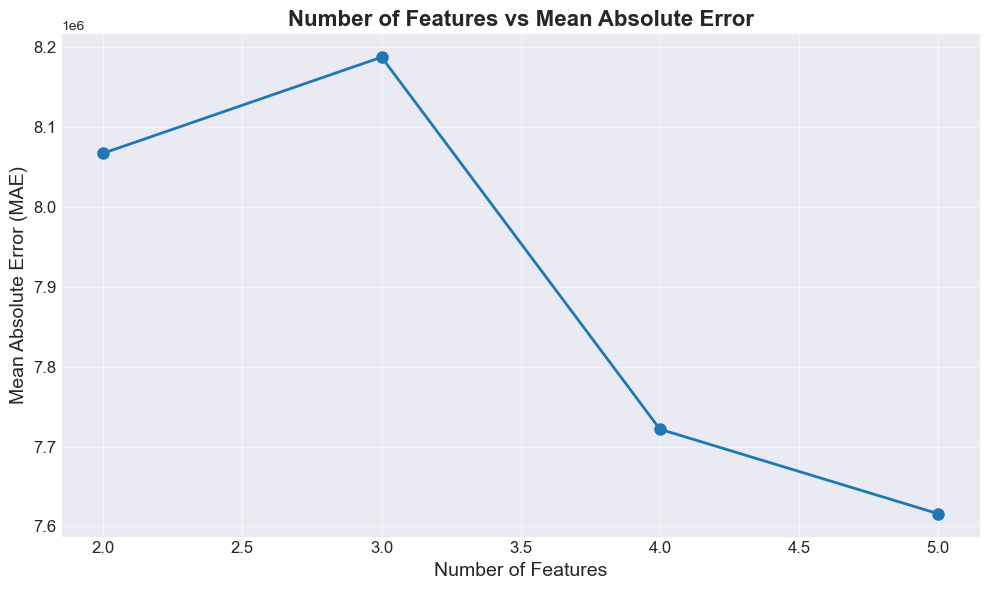

In [52]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['mae'], marker='o', markersize=8, linestyle='-', color='#1f77b4', linewidth=2)

# Adding title and labels
plt.title('Number of Features vs Mean Absolute Error', fontsize=16, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


In [53]:
## plotting mape

C:\Users\USER\AppData\Local\Temp\ipykernel_8272\666310825.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


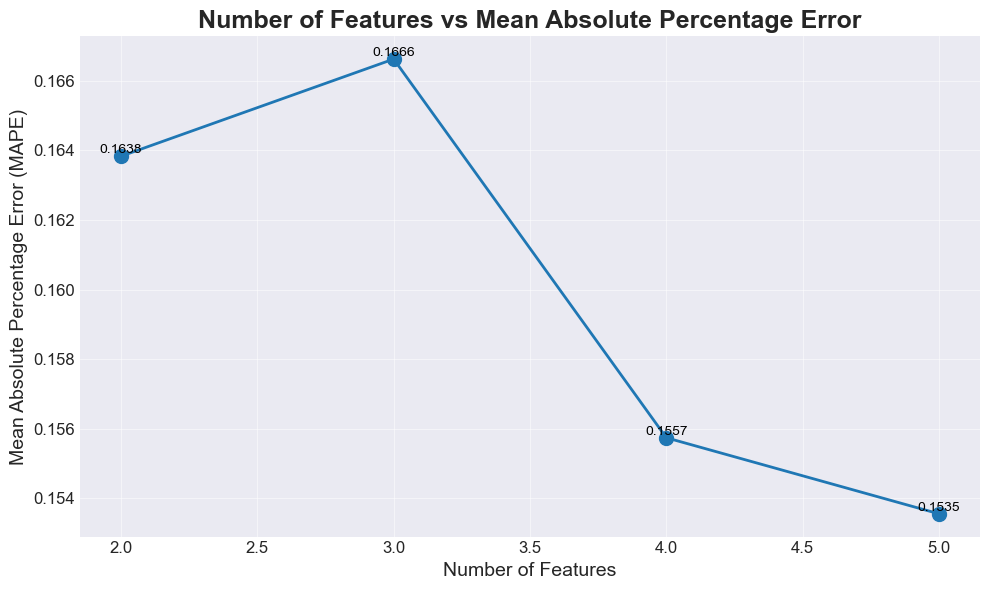

In [56]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['mape'], marker='o', markersize=10, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its MAPE value
for x, y in zip(results_df['num_features'], results_df['mape']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs Mean Absolute Percentage Error', fontsize=18, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Mean Absolute Percentage Error (MAPE)', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
### ploting rsquare

C:\Users\USER\AppData\Local\Temp\ipykernel_8272\605691214.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


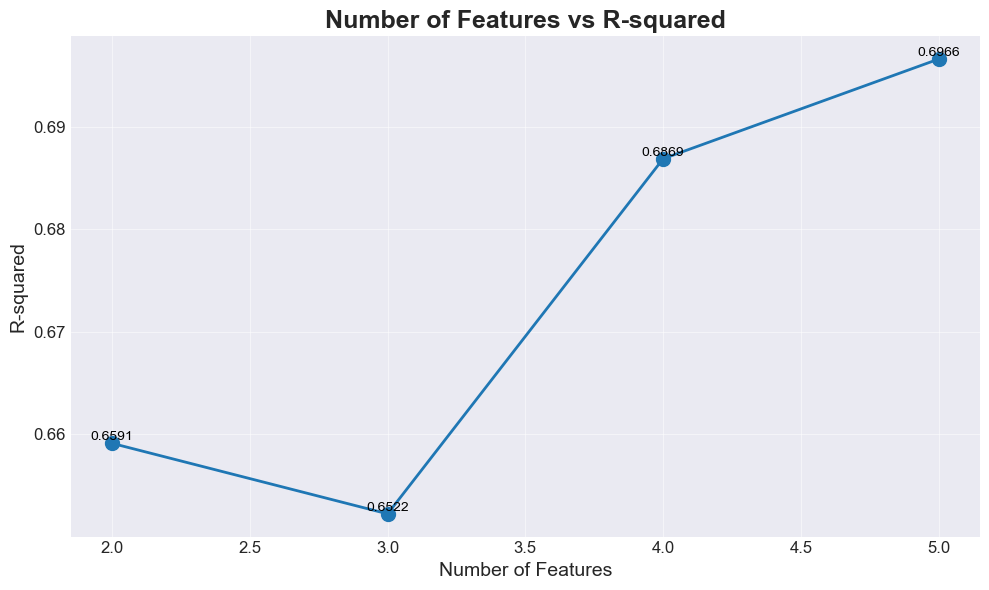

In [57]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['r2'], marker='o', markersize=10, linestyle='-', color='#1f77b4', linewidth=2)

# Annotate each data point with its R-squared value
for x, y in zip(results_df['num_features'], results_df['r2']):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom', fontsize=10, color='black')

# Adding title and labels
plt.title('Number of Features vs R-squared', fontsize=18, fontweight='bold')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('R-squared', fontsize=14)

# Set ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display grid
plt.grid(True, alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


### Getting machine learning input feature

In [58]:
X_test

,bedrooms,bathrooms,toilets,parking_space,title
14517,4.0,4.0,5.0,3.0,2
5914,4.0,4.0,5.0,4.0,2
15821,2.0,2.0,2.0,2.0,6
4777,4.0,4.0,5.0,1.0,5
6896,2.0,2.0,3.0,4.0,1
...,...,...,...,...,...
8082,4.0,4.0,5.0,4.0,2
9861,4.0,5.0,5.0,4.0,2
1695,3.0,4.0,5.0,2.0,6
4585,4.0,5.0,5.0,4.0,2


In [51]:
results_df['selected_features'][3]

array(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title'],
      dtype='<U13')

In [59]:
X_test.head(1)

,bedrooms,bathrooms,toilets,parking_space,title
14517,4.0,4.0,5.0,3.0,2


### Loading model

In [61]:
import pandas as pd

# Create a DataFrame for prediction
new_data = pd.DataFrame({
    'bedrooms': [4.0],
    'bathrooms': [4.0],
    'toilets': [5.0],
    'parking_space': [3.0],
    'title': [2.0]
})

# Load the model and column names from the pickle file
with open('best_model.pkl', 'rb') as f:
    loaded_model, loaded_columns = pickle.load(f)

# Ensure that the new data contains the same columns as the training data
new_data = new_data[loaded_columns]

# Use the loaded model to make predictions
prediction = loaded_model.predict(new_data)

print("Prediction:", prediction)


Prediction: [64116829.80026454]


In [63]:
ajah_filtered

,bedrooms,bathrooms,toilets,parking_space,title,price
3,4.0,4.0,5.0,6.0,2,40000000.0
9,4.0,4.0,5.0,5.0,2,60000000.0
24,4.0,4.0,5.0,3.0,2,60000000.0
36,3.0,5.0,5.0,4.0,6,40000000.0
53,4.0,4.0,5.0,3.0,4,60000000.0
...,...,...,...,...,...,...
24255,5.0,5.0,6.0,6.0,2,70000000.0
24261,4.0,5.0,5.0,4.0,1,28000000.0
24277,4.0,4.0,5.0,3.0,4,75000000.0
24288,3.0,4.0,4.0,3.0,6,40000000.0


In [75]:
X_test

,bedrooms,bathrooms,toilets,parking_space,title
14517,4.0,4.0,5.0,3.0,2
5914,4.0,4.0,5.0,4.0,2
15821,2.0,2.0,2.0,2.0,6
4777,4.0,4.0,5.0,1.0,5
6896,2.0,2.0,3.0,4.0,1
...,...,...,...,...,...
8082,4.0,4.0,5.0,4.0,2
9861,4.0,5.0,5.0,4.0,2
1695,3.0,4.0,5.0,2.0,6
4585,4.0,5.0,5.0,4.0,2


In [114]:
row_14517 = ajah_filtered.loc[4035]
print(row_14517)


bedrooms                4.0
bathrooms               5.0
toilets                 5.0
parking_space           6.0
title                   4.0
price            55000000.0
Name: 4035, dtype: float64


### dashboard development

In [88]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import pickle

# Load the model and column names from the pickle file
with open('best_model.pkl', 'rb') as f:
  loaded_model, loaded_columns = pickle.load(f)

# Initialize the Dash app with dark theme
app = dash.Dash(external_stylesheets=[dbc.themes.DARKLY])

# Define the layout of the app using Bootstrap components
app.layout = dbc.Container([
  html.H1("Model Interface", className='mb-4 mt-5 text-center text-white'),
  dbc.Row([  # Wrap your form elements in a Row
    dbc.Col(  # First Column for labels
      [
        dbc.Label("Bedrooms:", className='text-white'),
        dbc.Label("Bathrooms:", className='text-white'),
        dbc.Label("Toilets:", className='text-white'),
        dbc.Label("Parking Space:", className='text-white'),
        dbc.Label("Title:", className='text-white'),
      ],
      sm=3,  # Adjust column width as needed
    ),
    dbc.Col(  # Second Column for inputs and button
      [
        dbc.Input(id='bedrooms', type='number', value=2.0, className='mb-3'),
        dbc.Input(id='bathrooms', type='number', value=2.0, className='mb-3'),
        dbc.Input(id='toilets', type='number', value=2.0, className='mb-3'),
        dbc.Input(id='parking_space', type='number', value=2.0, className='mb-3'),
        dbc.Input(id='title', type='number', value=6.0, className='mb-3'),
        dbc.Button('Submit', id='submit-val', n_clicks=0, color='primary', className='mb-3')
      ]
    ),
  ]),
  html.Div(id='output-container-button', className='text-center text-white')
], className='py-5')

# Define callback to update output based on input
@app.callback(
  Output('output-container-button', 'children'),
  [Input('submit-val', 'n_clicks')],
  [Input('bedrooms', 'value'),
   Input('bathrooms', 'value'),
   Input('toilets', 'value'),
   Input('parking_space', 'value'),
   Input('title', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, toilets, parking_space, title):
  # Create a DataFrame for prediction
  new_data = pd.DataFrame({
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'toilets': [toilets],
    'parking_space': [parking_space],
    'title': [title]
  })

  # Ensure that the new data contains the same columns as the training data
  new_data = new_data[loaded_columns]

  # Use the loaded model to make predictions
  prediction = loaded_model.predict(new_data)

  return html.H4(f'Prediction: {prediction[0]}', className='text-primary mt-4')

# Run the app
if __name__ == '__main__':
  app.run_server(debug=True)


In [89]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import pickle

# Load the model and column names from the pickle file
with open('best_model.pkl', 'rb') as f:
  loaded_model, loaded_columns = pickle.load(f)

# Initialize the Dash app with dark theme
app = dash.Dash(external_stylesheets=[dbc.themes.DARKLY])

# Define the layout of the app using Bootstrap components
app.layout = dbc.Container([
  html.H1("Model Interface", className='mb-4 mt-5 text-center text-white'),
  dbc.Row([
    dbc.Col([
      dbc.Row([
        dbc.Label("Bedrooms:", width=4, className='text-white'),
        dbc.Col(dbc.Input(id='bedrooms', type='number', value=2.0), width=8),
      ], className='mb-3'),
      dbc.Row([
        dbc.Label("Bathrooms:", width=4, className='text-white'),
        dbc.Col(dbc.Input(id='bathrooms', type='number', value=2.0), width=8),
      ], className='mb-3'),
      dbc.Row([
        dbc.Label("Toilets:", width=4, className='text-white'),
        dbc.Col(dbc.Input(id='toilets', type='number', value=2.0), width=8),
      ], className='mb-3'),
      dbc.Row([
        dbc.Label("Parking Space:", width=4, className='text-white'),
        dbc.Col(dbc.Input(id='parking_space', type='number', value=2.0), width=8),
      ], className='mb-3'),
      dbc.Row([
        dbc.Label("Title:", width=4, className='text-white'),
        dbc.Col(dbc.Input(id='title', type='number', value=6.0), width=8),
      ], className='mb-3'),
      dbc.Row([
        dbc.Col(dbc.Button('Submit', id='submit-val', n_clicks=0, color='primary'), width={"size": 6, "offset": 3}),
      ])
    ], width=6)  # Adjust width as needed
  ], justify='center'),
  html.Div(id='output-container-button', className='text-center text-white')
], className='py-5')

# Define callback to update output based on input
@app.callback(
  Output('output-container-button', 'children'),
  [Input('submit-val', 'n_clicks')],
  [Input('bedrooms', 'value'),
   Input('bathrooms', 'value'),
   Input('toilets', 'value'),
   Input('parking_space', 'value'),
   Input('title', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, toilets, parking_space, title):
  if n_clicks > 0:  # Only predict after the button is clicked
    # Create a DataFrame for prediction
    new_data = pd.DataFrame({
      'bedrooms': [bedrooms],
      'bathrooms': [bathrooms],
      'toilets': [toilets],
      'parking_space': [parking_space],
      'title': [title]
    })

    # Ensure that the new data contains the same columns as the training data
    new_data = new_data[loaded_columns]

    # Use the loaded model to make predictions
    prediction = loaded_model.predict(new_data)

    return html.H4(f'Prediction: {prediction[0]}', className='text-primary mt-4')

  return ''  # Return an empty string if button not clicked

# Run the app
if __name__ == '__main__':
  app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[89], line 73, in update_output(
    n_clicks=1,
    bedrooms=None,
    bathrooms=2,
    toilets=2,
    parking_space=2,
    title=6
)
     70   new_data = new_data[loaded_columns]
     72   # Use the loaded model to make predictions
---> 73   prediction = loaded_model.predict(new_data)
        new_data =   bedrooms  bathrooms  toilets  parking_space  title
0     None          2        2              2      6
        prediction = array([64116829.80026454])
        loaded_model = Pipeline(steps=[('rfe',
                 RFE(estimator=RandomForestRegressor(random_state=58),
                     n_features_to_select=5)),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       max_features='log2', min_samples_leaf=2,
                                   

In [95]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Your array of property types
property_types = np.array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
                           'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
                           'Terraced Bungalow'])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the array
encoded_property_types = label_encoder.fit_transform(property_types)

# Display the encoded property types
print(encoded_property_types)

# Optionally, you can also display the mapping from labels to their encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


[2 6 4 1 0 3 5]
{'Block of Flats': 0, 'Detached Bungalow': 1, 'Detached Duplex': 2, 'Semi Detached Bungalow': 3, 'Semi Detached Duplex': 4, 'Terraced Bungalow': 5, 'Terraced Duplexes': 6}


In [96]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import pickle

# Load the model and column names from the pickle file
with open('best_model.pkl', 'rb') as f:
    loaded_model, loaded_columns = pickle.load(f)

# Define the house title mapping
title_mapping = {
    'Block of Flats': 0,
    'Detached Bungalow': 1,
    'Detached Duplex': 2,
    'Semi Detached Bungalow': 3,
    'Semi Detached Duplex': 4,
    'Terraced Bungalow': 5,
    'Terraced Duplexes': 6
}

# Initialize the Dash app with dark theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

# Define the layout of the app using Bootstrap components
app.layout = dbc.Container([
    html.H1("Model Interface", className='mb-4 mt-5 text-center text-white'),
    html.P(
        "Welcome to the House Price Prediction Dashboard! "
        "Enter the details of the house below and click 'Submit' to get a predicted price. "
        "Use the dropdown to select the type of house, and fill in the number of bedrooms, bathrooms, toilets, and parking spaces. "
        "This tool uses a machine learning model trained on real estate data to provide you with an estimate.",
        className='text-center text-white'
    ),
    dbc.Row([
        dbc.Col([
            dbc.Row([
                dbc.Label("Bedrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bedrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Bathrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bathrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Toilets:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='toilets', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Parking Space:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='parking_space', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Title:", width=4, className='text-white'),
                dbc.Col(dcc.Dropdown(
                    id='title',
                    options=[{'label': k, 'value': v} for k, v in title_mapping.items()],
                    value=6  # Default value
                ), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Col(dbc.Button('Submit', id='submit-val', n_clicks=0, color='primary'), width={"size": 6, "offset": 3}),
            ])
        ], width=6)  # Adjust width as needed
    ], justify='center'),
    html.Div(id='output-container-button', className='text-center text-white')
], className='py-5')

# Define callback to update output based on input
@app.callback(
    Output('output-container-button', 'children'),
    [Input('submit-val', 'n_clicks')],
    [Input('bedrooms', 'value'),
     Input('bathrooms', 'value'),
     Input('toilets', 'value'),
     Input('parking_space', 'value'),
     Input('title', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, toilets, parking_space, title):
    if n_clicks > 0:  # Only predict after the button is clicked
        # Create a DataFrame for prediction
        new_data = pd.DataFrame({
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'toilets': [toilets],
            'parking_space': [parking_space],
            'title': [title]
        })

        # Ensure that the new data contains the same columns as the training data
        new_data = new_data[loaded_columns]

        # Use the loaded model to make predictions
        prediction = loaded_model.predict(new_data)

        return html.H4(f'Prediction: {prediction[0]}', className='text-primary mt-4')

    return ''  # Return an empty string if button not clicked

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [100]:
import dash
import dash_auth
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import pickle

# Load the model and column names from the pickle file
with open('best_model.pkl', 'rb') as f:
    loaded_model, loaded_columns = pickle.load(f)

# Define the house title mapping
title_mapping = {
    'Block of Flats': 0,
    'Detached Bungalow': 1,
    'Detached Duplex': 2,
    'Semi Detached Bungalow': 3,
    'Semi Detached Duplex': 4,
    'Terraced Bungalow': 5,
    'Terraced Duplexes': 6
}

# Define username and password pairs
VALID_USERNAME_PASSWORD_PAIRS = {
    'deji': 'michael'
}

# Initialize the Dash app with dark theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
auth = dash_auth.BasicAuth(app, VALID_USERNAME_PASSWORD_PAIRS)

# Define the layout of the app using Bootstrap components
app.layout = dbc.Container([
    html.H1("Model Interface", className='mb-4 mt-5 text-center text-white'),
    html.P(
        "Welcome to the House Price Prediction Dashboard! "
        "Enter the details of the house below and click 'Submit' to get a predicted price. "
        "Use the dropdown to select the type of house, and fill in the number of bedrooms, bathrooms, toilets, and parking spaces. "
        "This tool uses a machine learning model trained on real estate data to provide you with an estimate.",
        className='text-center text-white'
    ),
    dbc.Row([
        dbc.Col([
            dbc.Row([
                dbc.Label("Bedrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bedrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Bathrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bathrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Toilets:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='toilets', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Parking Space:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='parking_space', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Title:", width=4, className='text-white'),
                dbc.Col(dcc.Dropdown(
                    id='title',
                    options=[{'label': k, 'value': v} for k, v in title_mapping.items()],
                    value=6  # Default value
                ), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Col(dbc.Button('Submit', id='submit-val', n_clicks=0, color='primary'), width={"size": 6, "offset": 3}),
            ])
        ], width=6)  # Adjust width as needed
    ], justify='center'),
    html.Div(id='output-container-button', className='text-center text-white')
], className='py-5')

# Define callback to update output based on input
@app.callback(
    Output('output-container-button', 'children'),
    [Input('submit-val', 'n_clicks')],
    [Input('bedrooms', 'value'),
     Input('bathrooms', 'value'),
     Input('toilets', 'value'),
     Input('parking_space', 'value'),
     Input('title', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, toilets, parking_space, title):
    if n_clicks > 0:  # Only predict after the button is clicked
        # Create a DataFrame for prediction
        new_data = pd.DataFrame({
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'toilets': [toilets],
            'parking_space': [parking_space],
            'title': [title]
        })

        # Ensure that the new data contains the same columns as the training data
        new_data = new_data[loaded_columns]

        # Use the loaded model to make predictions
        prediction = loaded_model.predict(new_data)

        return html.H4(f'Prediction: #{prediction[0]}', className='text-primary mt-4')

    return ''  # Return an empty string if button not clicked

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Exception: Login Required

In [98]:
!pip install dash_auth

Defaulting to user installation because normal site-packages is not writeable


In [108]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import pickle

# Load the model and column names from the pickle file
with open('best_model.pkl', 'rb') as f:
    loaded_model, loaded_columns = pickle.load(f)

# Define the house title mapping
title_mapping = {
    'Block of Flats': 0,
    'Detached Bungalow': 1,
    'Detached Duplex': 2,
    'Semi Detached Bungalow': 3,
    'Semi Detached Duplex': 4,
    'Terraced Bungalow': 5,
    'Terraced Duplexes': 6
}

# Initialize the Dash app with dark theme
app = dash.Dash( external_stylesheets=[dbc.themes.DARKLY])

# #setting password
# x = [['deji','ignore']]
# i = dash_auth.BasicAuth(app,x)

# Define the layout of the app using Bootstrap components
app.layout = dbc.Container([
    html.H1("Model Interface", className='mb-4 mt-5 text-center text-white'),
    html.P(
        "Welcome to the House Price Prediction Dashboard! "
        "Enter the details of the house below and click 'Submit' to get a predicted price. "
        "Use the dropdown to select the type of house, and fill in the number of bedrooms, bathrooms, toilets, and parking spaces. "
        "This tool uses a machine learning model trained on real estate data to provide you with an estimate.",
        className='text-center text-white'
    ),
    dbc.Row([
        dbc.Col([
            dbc.Row([
                dbc.Label("Bedrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bedrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Bathrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bathrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Toilets:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='toilets', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Parking Space:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='parking_space', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Col(
                    html.Div([
                        html.Label("House Type:", className='text-white'),
                        dcc.Dropdown(
                            id='title',
                            options=[{'label': k, 'value': v} for k, v in title_mapping.items()],
                            value=6,  # Default value
                            clearable=False,
                            className='mb-3'
                        ),
                    ]), width=8, className='mb-3'
                ),
            ]),
            dbc.Row([
                dbc.Col(dbc.Button('Submit', id='submit-val', n_clicks=0, color='primary'), width={"size": 6, "offset": 3}),
            ])
        ], width=6)  # Adjust width as needed
    ], justify='center'),
    html.Div(id='output-container-button', className='text-center text-white')
], className='py-5')

# Define callback to update output based on input
@app.callback(
    Output('output-container-button', 'children'),
    [Input('submit-val', 'n_clicks')],
    [Input('bedrooms', 'value'),
     Input('bathrooms', 'value'),
     Input('toilets', 'value'),
     Input('parking_space', 'value'),
     Input('title', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, toilets, parking_space, title):
    if n_clicks > 0:  # Only predict after the button is clicked
        # Create a DataFrame for prediction
        new_data = pd.DataFrame({
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'toilets': [toilets],
            'parking_space': [parking_space],
            'title': [title]
        })

        # Ensure that the new data contains the same columns as the training data
        new_data = new_data[loaded_columns]

        # Use the loaded model to make predictions
        prediction = loaded_model.predict(new_data)

        return html.H4(f'Prediction: #{prediction[0]}', className='text-primary mt-4')

    return ''  # Return an empty string if button not clicked

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [109]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import pickle
import requests

# Define the URL to your model on GitHub
model_url = "https://github.com/OBAUDE95/HousePricePrediction/raw/e6b85854afdc4e65a90e941706d90b2a1b74764a/best_model.pkl"

# Download the model file
response = requests.get(model_url)

if response.status_code == 200:
    loaded_model, loaded_columns = pickle.loads(response.content)
else:
    raise Exception("Failed to download the model file.")

# Define the house title mapping
title_mapping = {
    'Block of Flats': 0,
    'Detached Bungalow': 1,
    'Detached Duplex': 2,
    'Semi Detached Bungalow': 3,
    'Semi Detached Duplex': 4,
    'Terraced Bungalow': 5,
    'Terraced Duplexes': 6
}

# Initialize the Dash app with dark theme
app = dash.Dash(external_stylesheets=[dbc.themes.DARKLY])
server = app.server

# Define the layout of the app using Bootstrap components
app.layout = dbc.Container([
    html.H1("Model Interface", className='mb-4 mt-5 text-center text-white'),
    html.P(
        "Welcome to the House Price Prediction Dashboard! "
        "Enter the details of the house below and click 'Submit' to get a predicted price. "
        "Use the dropdown to select the type of house, and fill in the number of bedrooms, bathrooms, toilets, and parking spaces. "
        "This tool uses a machine learning model trained on real estate data to provide you with an estimate.",
        className='text-center text-white'
    ),
    dbc.Row([
        dbc.Col([
            dbc.Row([
                dbc.Label("Bedrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bedrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Bathrooms:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='bathrooms', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Toilets:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='toilets', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Label("Parking Space:", width=4, className='text-white'),
                dbc.Col(dbc.Input(id='parking_space', type='number', value=2.0), width=8),
            ], className='mb-3'),
            dbc.Row([
                dbc.Col(
                    html.Div([
                        html.Label("House Type:", className='text-white'),
                        dcc.Dropdown(
                            id='title',
                            options=[{'label': k, 'value': v} for k, v in title_mapping.items()],
                            value=6,  # Default value
                            clearable=False,
                            className='mb-3'
                        ),
                    ]), width=8, className='mb-3'
                ),
            ]),
            dbc.Row([
                dbc.Col(dbc.Button('Submit', id='submit-val', n_clicks=0, color='primary'), width={"size": 6, "offset": 3}),
            ])
        ], width=6)  # Adjust width as needed
    ], justify='center'),
    html.Div(id='output-container-button', className='text-center text-white')
], className='py-5')

# Define callback to update output based on input
@app.callback(
    Output('output-container-button', 'children'),
    [Input('submit-val', 'n_clicks')],
    [Input('bedrooms', 'value'),
     Input('bathrooms', 'value'),
     Input('toilets', 'value'),
     Input('parking_space', 'value'),
     Input('title', 'value')]
)
def update_output(n_clicks, bedrooms, bathrooms, toilets, parking_space, title):
    if n_clicks > 0:  # Only predict after the button is clicked
        # Create a DataFrame for prediction
        new_data = pd.DataFrame({
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'toilets': [toilets],
            'parking_space': [parking_space],
            'title': [title]
        })

        # Ensure that the new data contains the same columns as the training data
        new_data = new_data[loaded_columns]

        # Use the loaded model to make predictions
        prediction = loaded_model.predict(new_data)

        return html.H4(f'Prediction: #{prediction[0]:,.2f}', className='text-primary mt-4')

    return ''  # Return an empty string if button not clicked

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [110]:
import sklearn

In [111]:
sklearn.__version__

'1.2.1'

In [44]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import RFE

# Assuming ajah_filtered is your DataFrame
X, y = ajah_filtered.drop(columns=['price']), ajah_filtered['price']

# Define random state
random_state = 58

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=random_state)

# Define numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define Random Forest model
model = RandomForestRegressor(random_state=random_state)

# Initialize a list to store results
results = []

# Loop over different numbers of features to select
for num_features in range(1, len(numerical_cols) + 1):
    # Define RFE
    rfe = RFE(estimator=model, n_features_to_select=num_features, step=1)

    # Combine preprocessing steps, RFE, and Random Forest model
    model_pipeline = Pipeline(steps=[
        ('rfe', rfe),
        ('regressor', model)
    ])

    # Define hyperparameters grid
    param_grid = {
        'regressor__n_estimators': [100, 200, 500],
        'regressor__max_features': ['auto', 'sqrt', 'log2'],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__bootstrap': [True, False]
    }

    # Perform grid search cross-validation
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters found
    best_params = grid_search.best_params_
    print(f"Number of features {num_features}: Best Parameters: {best_params}")

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Get selected features
    selected_features = np.array(numerical_cols)[best_model.named_steps['rfe'].support_]

    # Append results to the list
    results.append({
        'num_features': num_features,
        'selected_features': selected_features,
        'mae': mae,
        'mape': mape,
        'rmse': rmse,
        'mse': mse,
        'r2': r2
    })

    print(f"Number of features {num_features}: Mean Squared Error: {mse}")
    print(f"Number of features {num_features}: Mean Absolute Error: {mae}")
    print(f"Number of features {num_features}: Mean Absolute Percentage Error: {mape}")
    print(f"Number of features {num_features}: R-squared: {r2}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

### checking for duplicate

In [157]:
df.duplicated().sum()

10438

## removing duplicate

In [158]:
df.drop_duplicates(inplace=True)

### checking for duplicate after cleaning

In [159]:
df.duplicated().sum()

0

## Exploratory data analysis

### pairplot

In [ ]:
sns.pairplot(df);

In [7]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


### Getting unique value for each location

In [8]:
df['town'].unique()

array(['Mabushi', 'Katampe', 'Lekki', 'Ajah', 'Epe', 'Lokogoma District',
       'Oredo', 'Victoria Island (VI)', 'Mowe Ofada', 'Ikeja', 'Ikoyi',
       'Magodo', 'Kaura', 'Galadimawa', 'Gwarinpa', 'Abeokuta North',
       'Lugbe District', 'Ibeju Lekki', 'Yaba', 'Sango Ota',
       'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Jahi', 'Ibadan', 'Orozo',
       'Ifo', 'Owerri North', 'Guzape District', 'Idu Industrial',
       'Owerri Municipal', 'Isheri North', 'Utako', 'Port Harcourt',
       'Kuje', 'Isheri', 'Life Camp', 'Ipaja', 'Ado-Odo/Ota', 'Dape',
       'Mushin', 'Ejigbo', 'Isolo', 'Ojodu', 'Gaduwa', 'Enugu', 'Dakwo',
       'Asokoro District', 'Alimosho', 'Sagamu', 'Chikun', 'Egbeda',
       'Wuye', 'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Ibafo',
       'Surulere', 'Obio-Akpor', 'Ayobo', 'Apo', 'Mowe Town',
       'Ibadan South-West', 'Wuse 2', 'Durumi', 'Simawa', 'Arepo',
       'Ikotun', 'Oluyole', 'Maitama District', 'Maryland', 'Ido',
       'Karsana', 'Wuse', 'Ilorin West', 

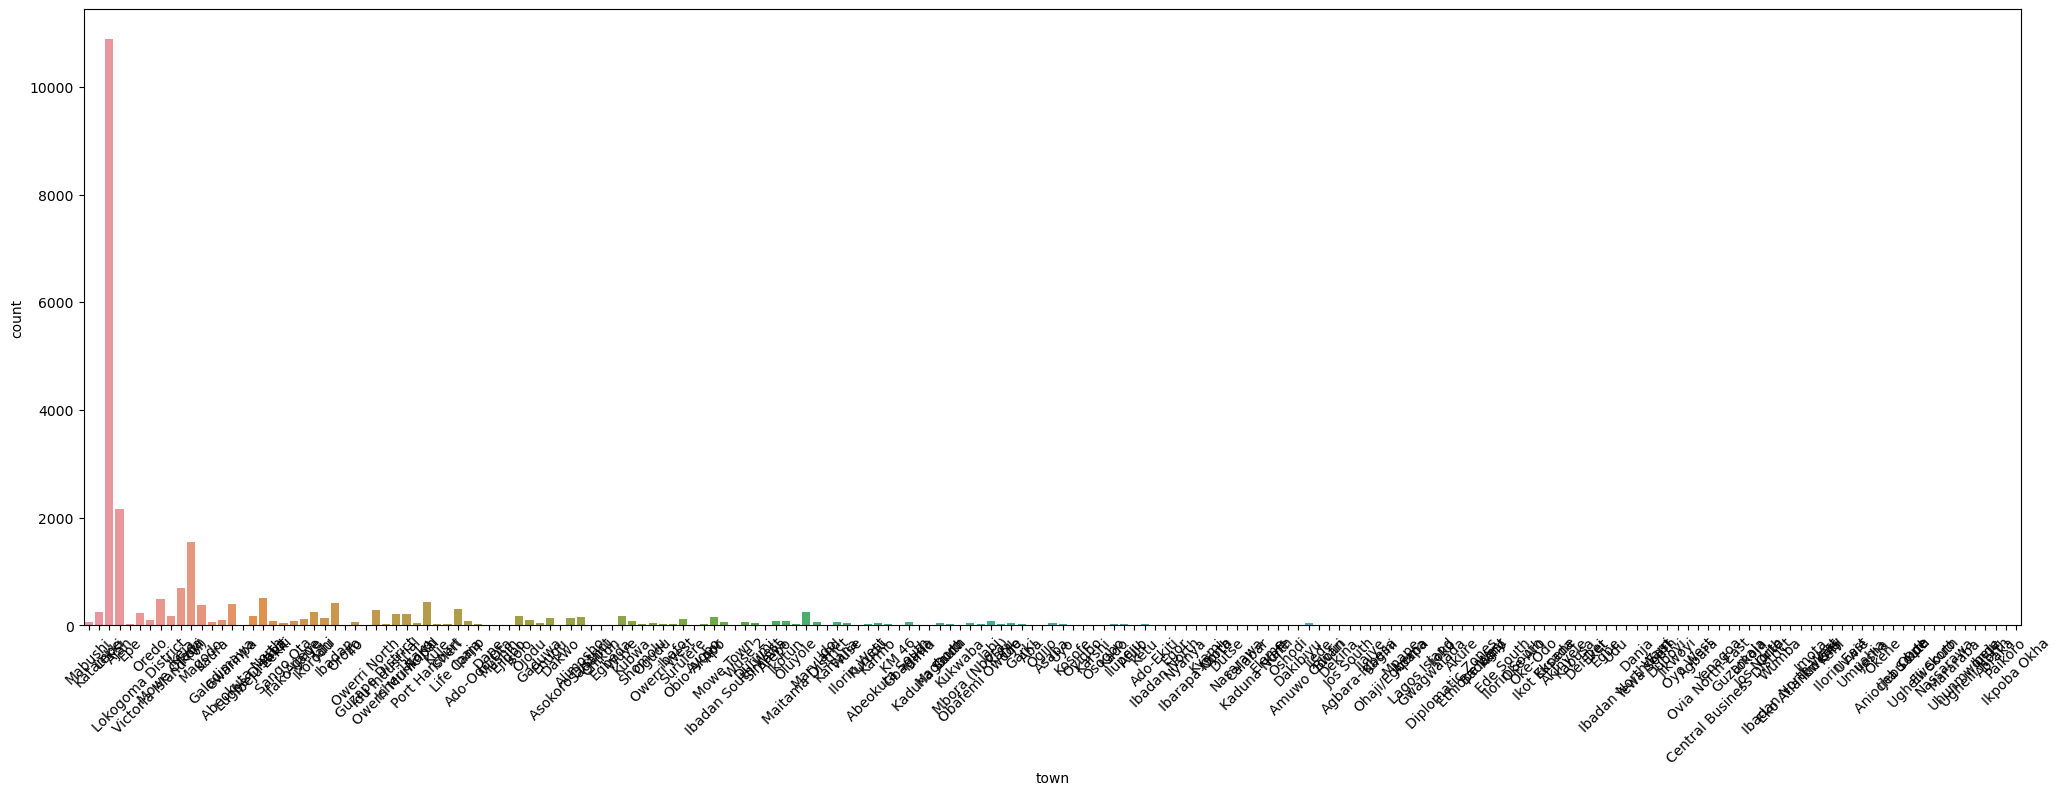

In [16]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x='town')
plt.xticks(rotation=45);

### Getting title

In [162]:
df['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

## Average price for buildings

In [163]:
df.groupby("title").mean()['price']

C:\Users\USER\AppData\Local\Temp\ipykernel_11924\2439800582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("title").mean()['price']


title
Block of Flats            1.723077e+08
Detached Bungalow         4.438340e+07
Detached Duplex           6.326634e+08
Semi Detached Bungalow    3.701693e+07
Semi Detached Duplex      5.700745e+08
Terraced Bungalow         4.476206e+07
Terraced Duplexes         1.470314e+08
Name: price, dtype: float64

### Average price of per building per state

In [164]:
df.groupby(['state','title']).mean()['price']

C:\Users\USER\AppData\Local\Temp\ipykernel_11924\312008518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['state','title']).mean()['price']


state   title                 
Abia    Block of Flats            6.280000e+07
        Detached Bungalow         6.300000e+07
        Detached Duplex           1.950000e+08
Abuja   Block of Flats            2.667799e+08
        Detached Bungalow         4.438747e+07
                                      ...     
Rivers  Detached Duplex           1.738704e+08
        Semi Detached Bungalow    4.218750e+07
        Semi Detached Duplex      2.738696e+08
        Terraced Bungalow         3.000000e+07
        Terraced Duplexes         7.875000e+07
Name: price, Length: 113, dtype: float64

### Numbers of building 

In [165]:
df['title'].value_counts()

Detached Duplex           6449
Terraced Duplexes         1986
Detached Bungalow         1882
Block of Flats            1552
Semi Detached Duplex      1424
Semi Detached Bungalow     420
Terraced Bungalow          175
Name: title, dtype: int64

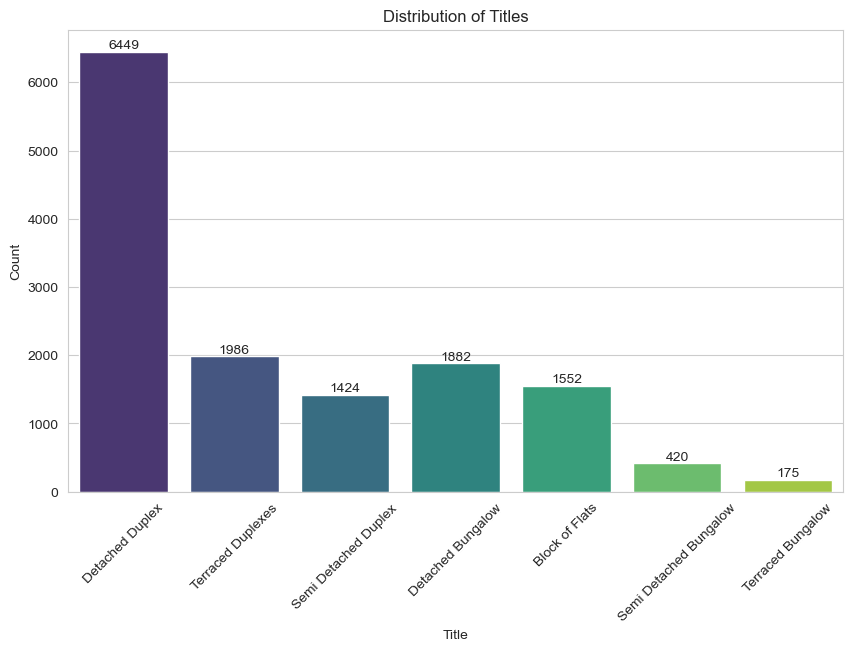

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

p = [6449,1986,1424,1882,1552,420,175]
# Plot
sns.countplot(x='title', data=df, palette='viridis')

# Title and labels
plt.title('Distribution of Titles')
plt.xlabel('Title')
plt.ylabel('Count')

for value in range(len(p)):
    plt.text(value,p[value],p[value],va='bottom',ha='center')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

plt.show()


### relatinship between toilet and bathrooms

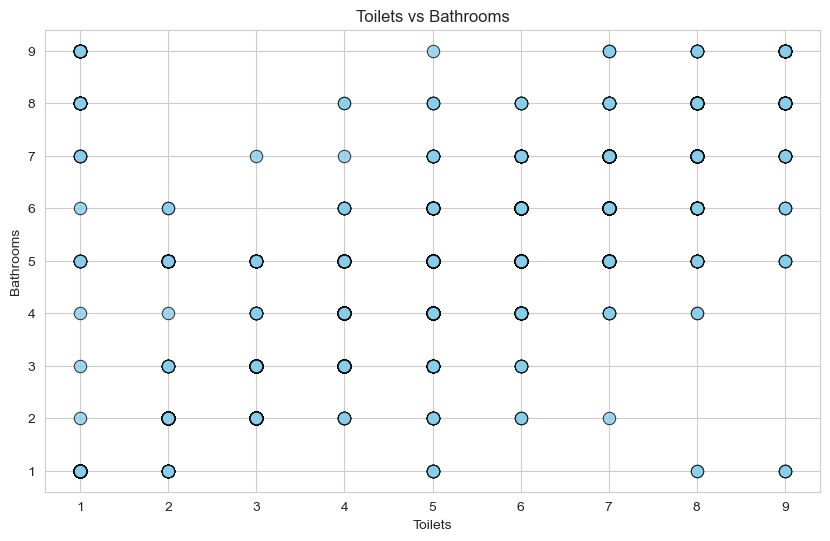

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

# Plot
sns.scatterplot(data=df, x='toilets', y='bathrooms', alpha=0.8, s=80, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Toilets vs Bathrooms')
plt.xlabel('Toilets')
plt.ylabel('Bathrooms')

# Add grid
plt.grid(True)

plt.show()


### relationship between price and bedroom

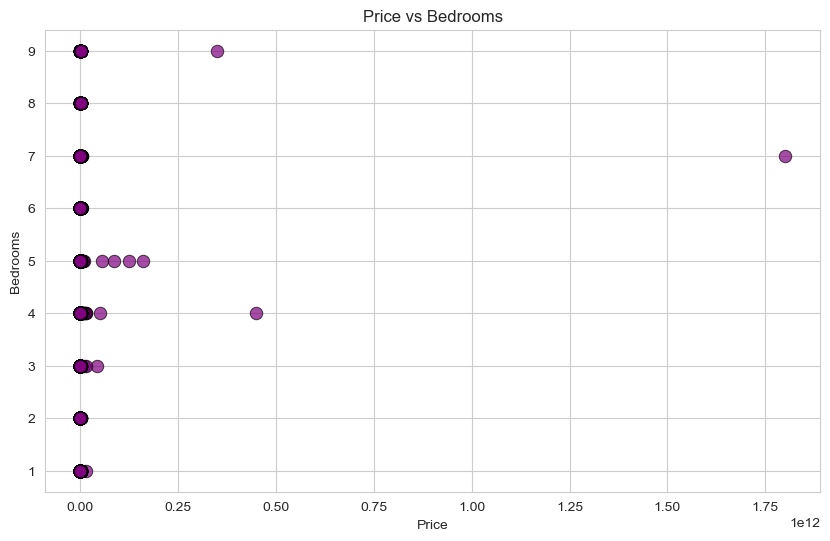

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

# Plot
sns.scatterplot(data=df, x='price', y='bedrooms', alpha=0.7, s=80, color='purple', edgecolor='black')

# Title and labels
plt.title('Price vs Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms')

# Add grid
plt.grid(True)

plt.show()


### relationship between price and bathroom

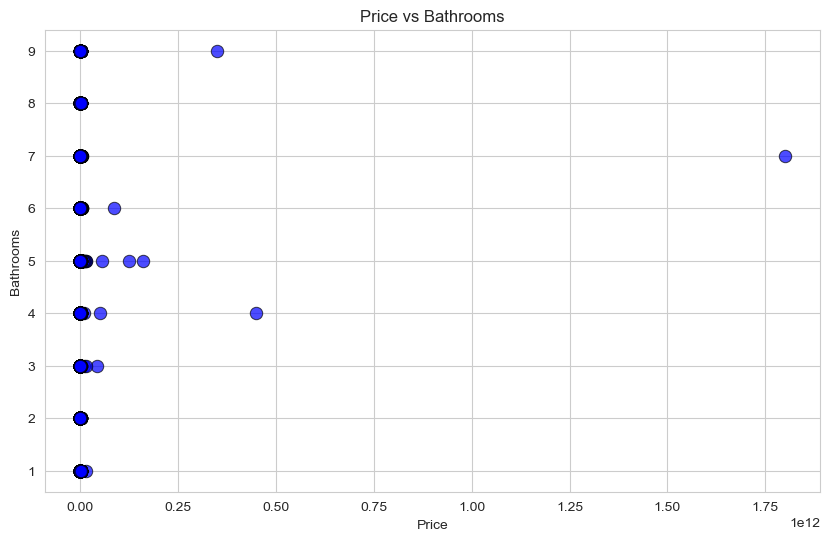

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

# Plot
sns.scatterplot(data=df, x='price', y='bathrooms', alpha=0.7, s=80, color='blue', edgecolor='black')

# Title and labels
plt.title('Price vs Bathrooms')
plt.xlabel('Price')
plt.ylabel('Bathrooms')

# Add grid
plt.grid(True)

plt.show()


### relationship between price and parking_space

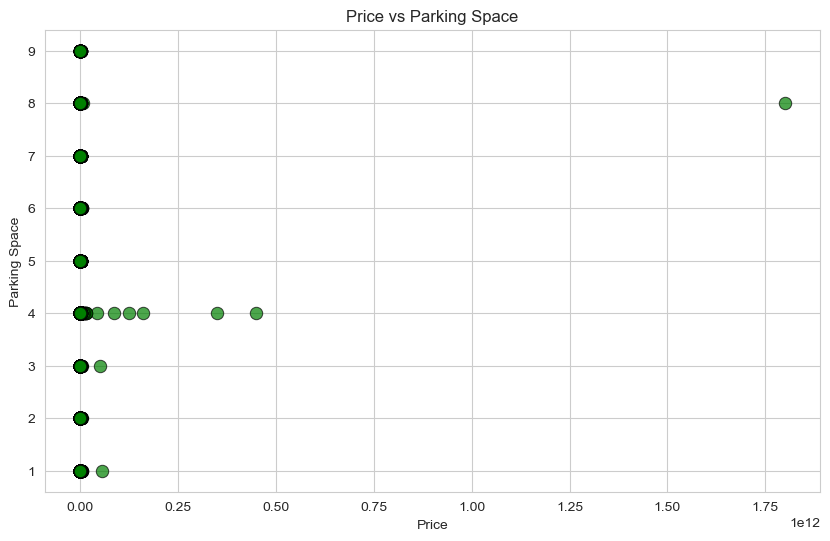

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

# Plot
sns.scatterplot(data=df, x='price', y='parking_space', alpha=0.7, s=80, color='green', edgecolor='black')

# Title and labels
plt.title('Price vs Parking Space')
plt.xlabel('Price')
plt.ylabel('Parking Space')

# Add grid
plt.grid(True)

plt.show()


### correlation analysis

In [9]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_8904\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.726557,0.610501,0.158528,0.025734
bathrooms,0.726557,1.000000,0.719102,0.174129,0.021965
toilets,0.610501,0.719102,1.000000,0.225345,0.015486
parking_space,0.158528,0.174129,0.225345,1.000000,0.018370
price,0.025734,0.021965,0.015486,0.018370,1.000000


## ajah

In [10]:
df = df[df['town'] == 'Ajah']

In [11]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000.0
24,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,60000000.0
36,3.0,5.0,5.0,4.0,Terraced Duplexes,Ajah,Lagos,40000000.0
53,4.0,4.0,5.0,3.0,Semi Detached Duplex,Ajah,Lagos,60000000.0


In [12]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_8904\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.726027,0.763920,0.305866,0.002227
bathrooms,0.726027,1.000000,0.811713,0.299609,-0.009532
toilets,0.763920,0.811713,1.000000,0.282950,-0.011871
parking_space,0.305866,0.299609,0.282950,1.000000,-0.003064
price,0.002227,-0.009532,-0.011871,-0.003064,1.000000


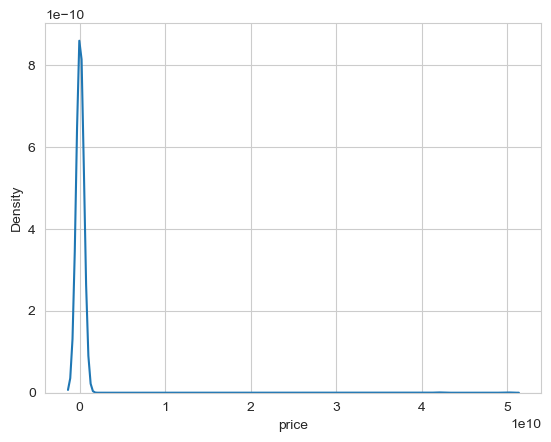

In [194]:
sns.kdeplot(data=df,x='price');

# Building machine learning model 

In [14]:
df = df_no_outliers

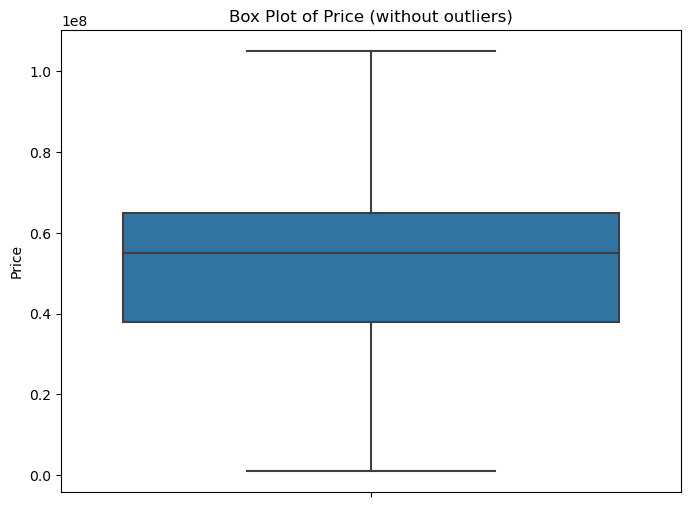

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Adjust figure size if needed
plt.figure(figsize=(8, 6))

# Create box plot without outliers
sns.boxplot(data=df_no_outliers, y='price')

# Add title and labels
plt.title('Box Plot of Price (without outliers)')
plt.ylabel('Price')

# Show plot
plt.show()


In [16]:
df_no_outliers = df

In [17]:
df_no_outliers.duplicated().sum()

903

In [230]:
df_no_outliers.drop_duplicates(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11924\1552115246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop_duplicates(inplace=True)


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df_no_outliers.drop(['town','state'],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df_no_outliers['title'] = label_encoder.fit_transform(df_no_outliers['title'].to_list())

# Now, the categorical columns in X have been encoded with numeric labels


In [21]:
df_no_outliers

,bedrooms,bathrooms,toilets,parking_space,title,price
3,4.0,4.0,5.0,6.0,2,40000000.0
9,4.0,4.0,5.0,5.0,2,60000000.0
24,4.0,4.0,5.0,3.0,2,60000000.0
36,3.0,5.0,5.0,4.0,6,40000000.0
53,4.0,4.0,5.0,3.0,4,60000000.0
...,...,...,...,...,...,...
24255,5.0,5.0,6.0,6.0,2,70000000.0
24261,4.0,5.0,5.0,4.0,1,28000000.0
24277,4.0,4.0,5.0,3.0,4,75000000.0
24288,3.0,4.0,4.0,3.0,6,40000000.0


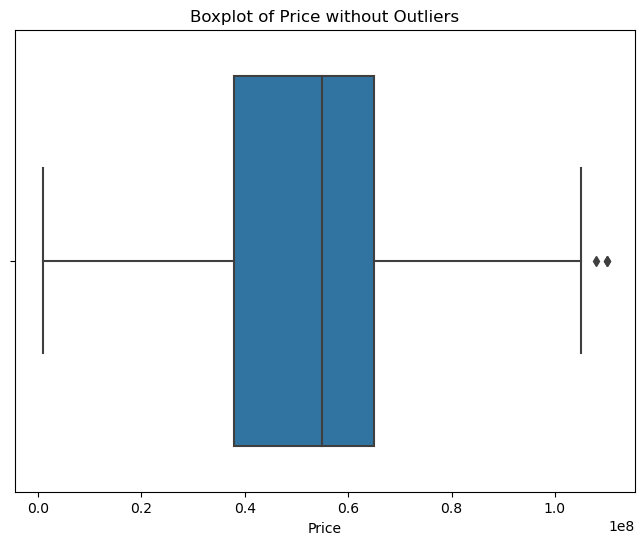

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_no_outliers is your DataFrame without outliers
# 'price' is the column you want to plot

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['price'])
plt.title('Boxplot of Price without Outliers')
plt.xlabel('Price')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8904\3799915012.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_no_outliers['price'], shade=True)


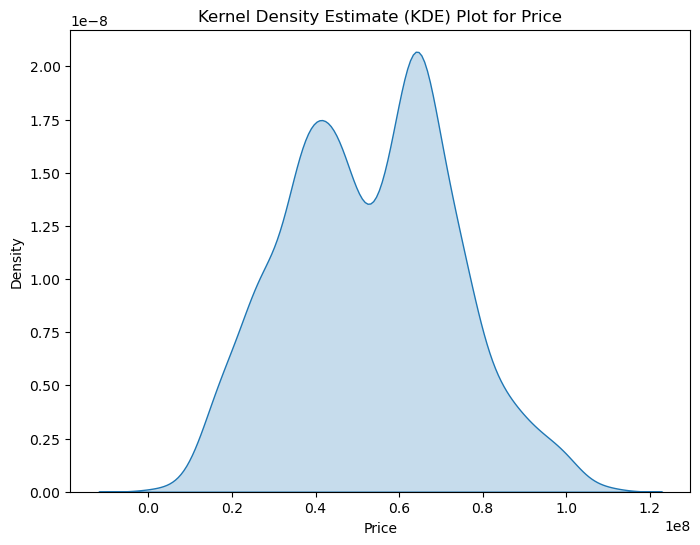

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_no_outliers is your DataFrame without outliers
# 'price' is the column you want to plot

# Plotting the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_no_outliers['price'], shade=True)
plt.title('Kernel Density Estimate (KDE) Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [64]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing steps
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Define Random Forest model
model = RandomForestRegressor()

# Combine preprocessing steps with Random Forest model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 192806911683312.28
Mean Absolute Error: 10287501.737939417
R-squared: 0.5193031818032235


# this

In [88]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Define numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing steps
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Define Gradient Boosting model
model = GradientBoostingRegressor()

# Combine preprocessing steps with Gradient Boosting model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Define hyperparameters grid
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__learning_rate': [0.001, 0.1, 0.5]
}

# Perform randomized search cross validation
random_search = RandomizedSearchCV(model_pipeline, param_distributions=param_grid, n_iter=10, cv=2, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


C:\ProgramData\anaconda\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best Parameters: {'regressor__n_estimators': 100, 'regressor__learning_rate': 0.1}
Mean Squared Error: 126209252676764.12
Mean Absolute Error: 7978690.997302413
R-squared: 0.6461107591855917


In [26]:
df_no_outliers.describe()

,bedrooms,bathrooms,toilets,parking_space,title,price
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2.002000e+03
mean,3.820679,4.166334,4.814186,3.751249,2.692308,5.317267e+07
std,0.939080,1.011086,1.022700,1.189686,1.725613,1.972985e+07
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000e+06
25%,3.000000,4.000000,4.000000,3.000000,2.000000,3.800000e+07
50%,4.000000,4.000000,5.000000,4.000000,2.000000,5.500000e+07
75%,4.000000,5.000000,5.000000,4.000000,4.000000,6.500000e+07
max,8.000000,8.000000,9.000000,8.000000,6.000000,1.100000e+08


In [27]:
df_no_outliers

,bedrooms,bathrooms,toilets,parking_space,title,price
3,4.0,4.0,5.0,6.0,2,40000000.0
9,4.0,4.0,5.0,5.0,2,60000000.0
24,4.0,4.0,5.0,3.0,2,60000000.0
36,3.0,5.0,5.0,4.0,6,40000000.0
53,4.0,4.0,5.0,3.0,4,60000000.0
...,...,...,...,...,...,...
24255,5.0,5.0,6.0,6.0,2,70000000.0
24261,4.0,5.0,5.0,4.0,1,28000000.0
24277,4.0,4.0,5.0,3.0,4,75000000.0
24288,3.0,4.0,4.0,3.0,6,40000000.0


In [28]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant (intercept term) to the DataFrame
df_with_constant = add_constant(df_no_outliers)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = df_with_constant.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i)
                   for i in range(df_with_constant.shape[1])]

print(vif_data)


         feature        VIF
0          const  32.912991
1       bedrooms   2.823992
2      bathrooms   3.005586
3        toilets   3.383989
4  parking_space   1.136832
5          title   1.050764
6          price   1.578326


In [29]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Define and train the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 155077945969798.78
Mean Absolute Error: 9475268.595529499
R-squared: 0.5506617610346003


In [32]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Define Gradient Boosting model
model = GradientBoostingRegressor()

# Define hyperparameters grid including learning rate
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.5]
}

# Perform randomized search cross validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 500, 'learning_rate': 0.01}
Mean Squared Error: 231863834862750.56
Mean Absolute Error: 10990087.828916758
R-squared: 0.38908494521457715


In [56]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Define Gradient Boosting model
model = GradientBoostingRegressor()

# Define a list of 15 learning rates
learning_rates = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Define hyperparameters grid including learning rate
param_grid = {
    'n_estimators': [50, 100,200,300],
    'learning_rate': learning_rates
}

# Perform grid search cross validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 200}
GradientBoostingRegressor(learning_rate=0.05, n_estimators=200)
Mean Squared Error: 156793915229121.8
Mean Absolute Error: 9185618.374218697
R-squared: 0.6228259599149635


In [57]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Gradient Boosting model
model = GradientBoostingRegressor()

# Define a list of 15 learning rates
learning_rates = [0.001, 0.005,0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Define hyperparameters grid including learning rate
param_grid = {
    'n_estimators': [x for x in range(100,500,50)],
    'learning_rate': learning_rates
}

# Perform grid search cross validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 300}
Mean Squared Error: 228204768238540.94
Mean Absolute Error: 10758267.733302956
R-squared: 0.4544957227968186


In [41]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Random Forest model
model = RandomForestRegressor()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Mean Squared Error: 169049371151511.12
Mean Absolute Error: 9620528.021963784
R-squared: 0.5325929180869793


In [42]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Random Forest model
model = RandomForestRegressor()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search cross validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=6, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Mean Squared Error: 183328208889939.28
Mean Absolute Error: 9287587.439110156
R-squared: 0.5383415408528065


In [43]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Ridge regression model
model = Ridge()

# Define hyperparameters grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]  # Regularization strength
}

# Perform randomized search cross validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\ProgramData\anaconda\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'alpha': 0.1}
Mean Squared Error: 209727569016223.38
Mean Absolute Error: 11327815.376100436
R-squared: 0.42471585142866897


In [44]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Lasso regression model
model = Lasso()

# Define hyperparameters grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]  # Regularization strength
}

# Perform randomized search cross validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=2, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



C:\ProgramData\anaconda\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best Parameters: {'alpha': 10.0}
Mean Squared Error: 225207249883622.47
Mean Absolute Error: 11828294.90078459
R-squared: 0.4364280183466275


In [45]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Elastic Net regression model
model = ElasticNet()

# Define hyperparameters grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mixing parameter, with 0 <= l1_ratio <= 1
}

# Perform randomized search cross validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=2, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'l1_ratio': 0.7, 'alpha': 0.1}
Mean Squared Error: 219955642217936.6
Mean Absolute Error: 11948363.396580556
R-squared: 0.42374810516210315


In [52]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Define Random Forest model (estimator)
estimator = RandomForestRegressor()

# Perform Randomized Search to find the optimal hyperparameters
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)
best_estimator = random_search.best_estimator_

# Initialize RFE with cross-validation
rfe = RFECV(estimator=best_estimator, cv=5, scoring='neg_mean_absolute_error')

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Print selected features
print("Selected features:")
print(X.columns[rfe.support_])

# Evaluate the best model with selected features
y_pred = rfe.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Selected features:
Index(['bedrooms', 'bathrooms', 'parking_space', 'title'], dtype='object')
Mean Squared Error: 183624120118534.78
Mean Absolute Error: 9439618.058289811
R-squared: 0.538988589378691


In [50]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Define Random Forest model (estimator)
estimator = RandomForestRegressor()

# Perform Randomized Search to find the optimal hyperparameters
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)
best_estimator = random_search.best_estimator_

# Initialize RFE with cross-validation and mean absolute error as scoring metric
rfe = RFECV(estimator=best_estimator, cv=5, scoring='neg_mean_absolute_error')

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Print selected features
print("Selected features:")
print(X.columns[rfe.support_])

# Evaluate the best model with selected features
y_pred = rfe.predict(X_test)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Selected features:
Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title'], dtype='object')
Mean Absolute Error: 9446010.352060689


In [53]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Random Forest model (estimator)
estimator = RandomForestRegressor()

# Perform Randomized Search to find the optimal hyperparameters
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)
best_estimator = random_search.best_estimator_

# Initialize RFE with cross-validation and mean absolute error as scoring metric
rfe = RFECV(estimator=best_estimator, cv=5, scoring='neg_mean_absolute_error')

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Print selected features
print("Selected features:")
print(X.columns[rfe.support_])

# Evaluate the best model with selected features
y_pred = rfe.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Selected features:
Index(['bedrooms', 'title'], dtype='object')
Mean Absolute Error: 10378267.105508447
Mean Absolute Percentage Error (MAPE): 43.21528773397622
R-squared: 0.47817217509119625
Root Mean Squared Error (RMSE): 14650429.93053882


In [55]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your features and target variable
X, y = df_no_outliers.drop(columns=['price']), df_no_outliers['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define Random Forest model (estimator)
estimator = RandomForestRegressor()

# Perform Randomized Search to find the optimal hyperparameters
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=9, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)
best_estimator = random_search.best_estimator_

# Initialize RFE with mean absolute error as scoring metric
rfe = RFECV(estimator=best_estimator, scoring='neg_mean_absolute_error')

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Print selected features
print("Selected features:")
print(X.columns[rfe.support_])

# Select the features on the test set
X_test_selected = X_test[:, rfe.support_]

# Evaluate the best model with selected features
y_pred = best_estimator.predict(X_test_selected)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


Fitting 9 folds for each of 10 candidates, totalling 90 fits
Selected features:
Index(['bedrooms', 'bathrooms', 'title'], dtype='object')


InvalidIndexError: (slice(None, None, None), array([ True,  True, False, False,  True]))